In [115]:
from pyDAW import DataLoading
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [116]:
data,df,open_ch=DataLoading(
    ["/mnt/data/wxy/VUV4/VUV4_raw_b0_seg0.bin"]
)

Recalculated and saved DataFrame to /mnt/data/wxy/VUV4/VUV4_df.csv
collection time:  0.00039571558555555553
Open Channel: [12]


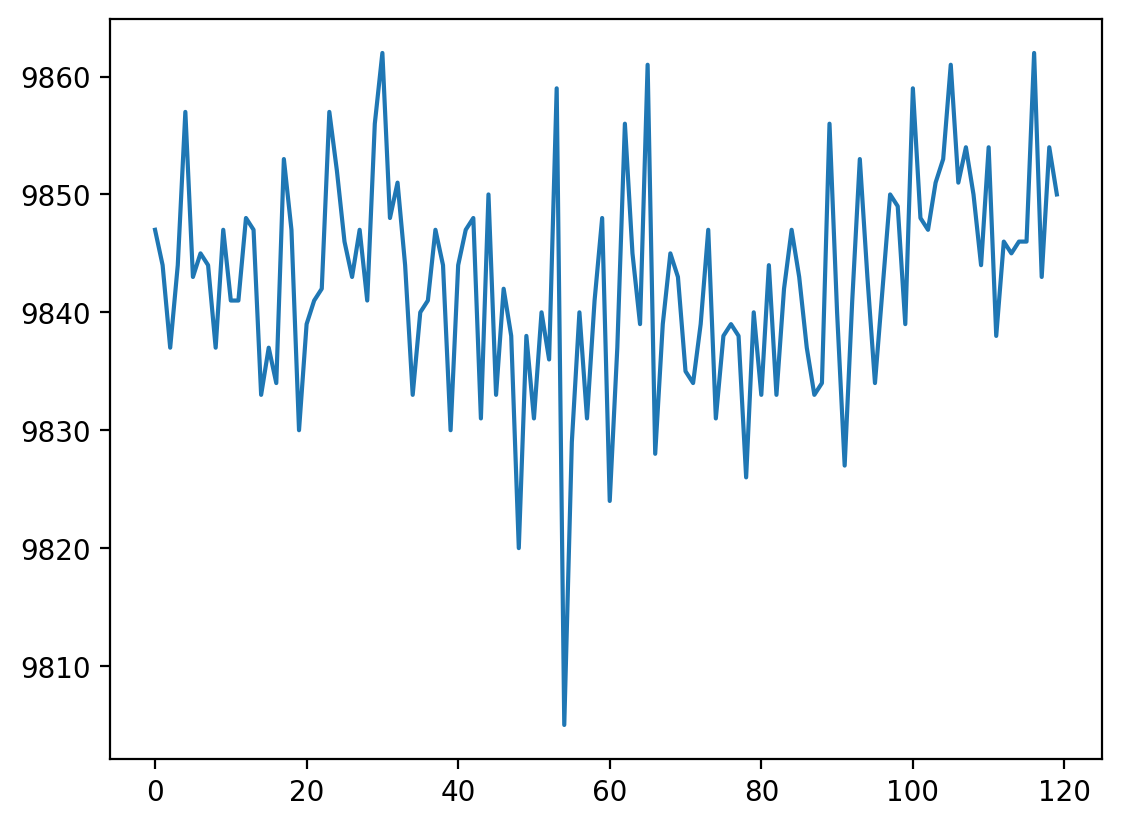

In [117]:
i=np.random.randint(0,len(data))
plt.plot(data[i].waveform)

In [118]:
df["charge"]=np.array([np.sum(data[i].waveform[40:120]-data[i].baseline) for i in range(len(data))])

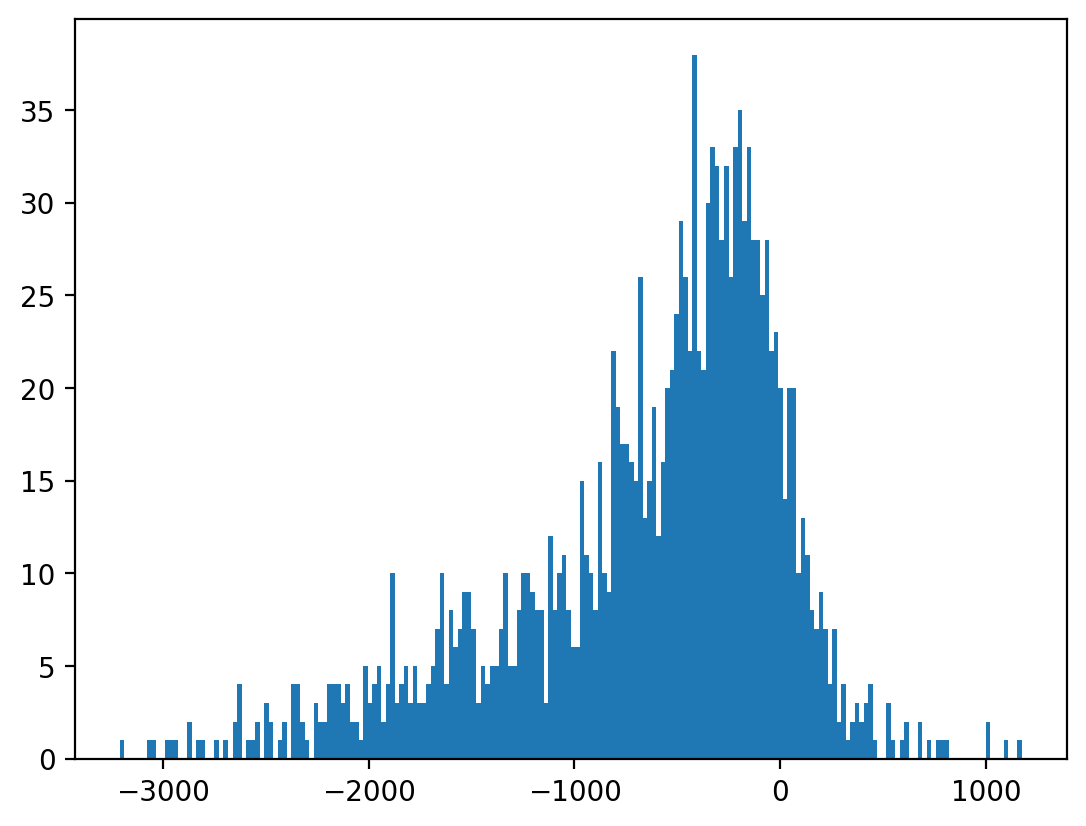

In [119]:
plt.hist(df["charge"],bins=200)
plt.show()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3210.  , -3188.08, -3166.16, -3144.24, -3122.32, -3100.4 ,
        -3078.48, -3056.56, -3034.64, -3012.72, -2990.8 , -2968.88,
        -2946.96, -2925.04, -2903.12, -2881.2 , -2859.28, -2837.36,
        -2815.44, -2793.52, -2771.6 , -2749.68, -2727.76, -2705.84,
        -2683.92, -2662.  , -2640.08, -2618.16, -2596.24, -2574.32,
        -2552.4 , -2530.48, -2508.56, -2486.64, -2464.72, -2442.8 ,
        -2420.88, -2398.96, -2377.04, -2355.12, -2333.2 , -2311.28,
        -2289.36, -2267.44, -2245.52, -2223.6 , -2201.68, -2179.76,
        -2157.84, -2135.92, -2114.  , -2092.08, -2070.16, -2048.24,
        -2026.32, -2004.4 , -1982.48, -1960.56, -1938.64, -1916.72,
        -1894.8 , -1872.88, -1850.96, -1829.04, -1807.12, -1785.2 ,
   

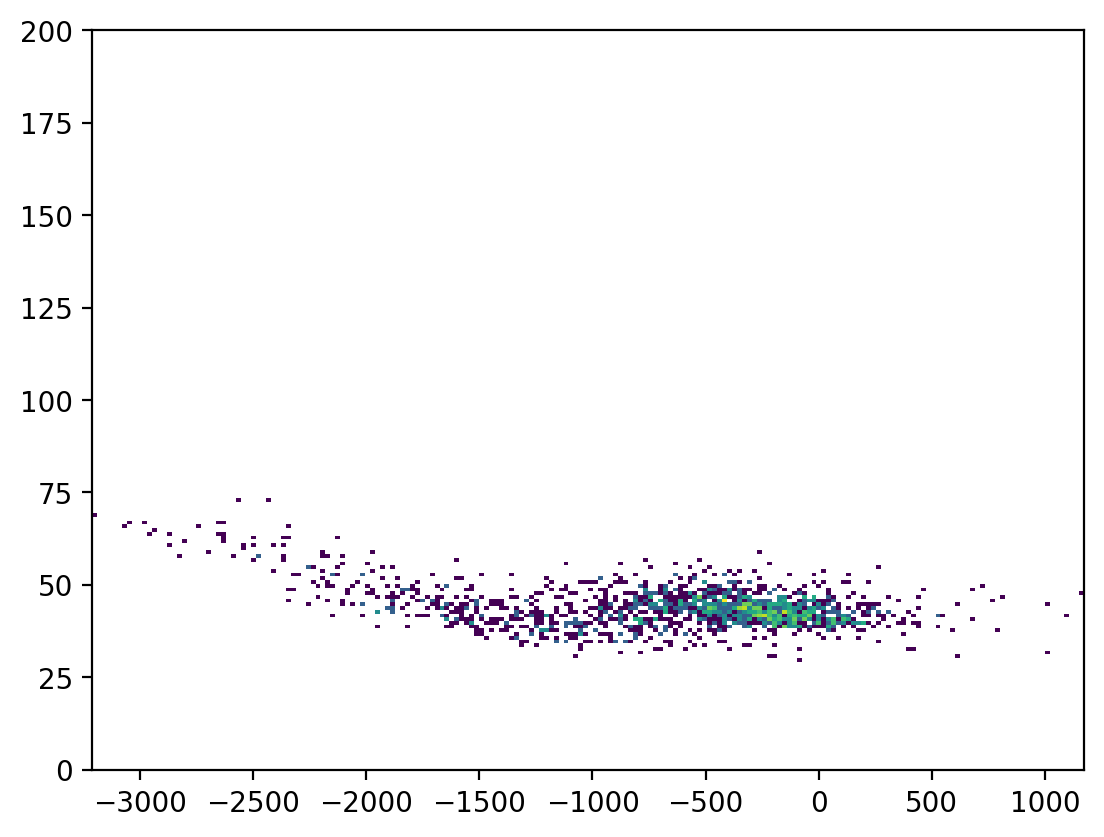

In [120]:
from matplotlib.colors import LogNorm
from matplotlib.pylab import norm


plt.hist2d(df["charge"], df["c_peak"], bins=[200,np.linspace(0,200,200)], norm=LogNorm())

In [121]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

num = len(data)
a = []
for i in range(num):
    a.append(np.linspace(2, 120, 200))

a = np.array(a)  # 确保 a 是 NumPy 数组
b = np.array([data[i][0:120] - data[i].baseline for i in range(num)])  # 确保 b 也是 NumPy 数组

# 将 a 和 b 展平为一维数组
a = a.ravel()
b = b.ravel()

# 确保 a 和 b 的长度匹配
if len(a) != len(b):
    raise ValueError("a 和 b 的长度不匹配")

plt.hist2d(a, b, bins=[np.linspace(0, 200, 200), np.linspace(-180, 50, 230)], norm=LogNorm())

plt.title("VUV4 External Trigger")
plt.xlabel("Time (4*ns)")
plt.ylabel("Amplitude (ADC)")

plt.show()

ValueError: a 和 b 的长度不匹配